# CountVectorizer Models
In order to train a model on our titles, we need to represent our text numerically. In this notebook, we explore the simplest way to do this: with a "Bag of Words" representation, and then fitting a variety of models to the ensulting features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

In [2]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB
# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer,\
                                            TfidfVectorizer

In [3]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

In [4]:
def save_obj(obj, filename):
    with open(filename + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(filename):
    with open(filename + '.pkl', 'rb') as f:
        return pickle.load(f)

In [5]:
DIR = "C:\\Users\\AzNsAnTaGiN\\DSI\\Projects\\project_3\\data\\"
FILE1 = "theonion"
FILE2 = "nottheonion"
FILE3 = "onionheadlines"

# Data Import
We previously cleaned our data, so lets get it:

In [6]:
X_theonion = load_obj(DIR+FILE1+"_df_clean")
X_nottheonion = load_obj(DIR+FILE2+"_df_clean")

In [7]:
X_theonion["is_onion"] = 1
X_nottheonion["is_onion"] = -1

In [8]:
len(X_theonion)

8588

In [9]:
len(X_nottheonion)

419204

We have about 50x as much data from `not_theonion`.

Grabbing some titles for our presentation:

In [66]:
X_theonion.sample(10)["title"].values

array(['Day Without A Woman Sees Thousands Leave Work',
       'Mute, Terrified Rubio Awakes To Find Self Unable To Vocalize Any Unscripted Sentiment',
       'Entirety Of Hollywood Film Industry Replaced With 40,000 Christopher Plummers',
       'Cackling Mitch McConnell Reveals To Stunned Democrats Hes Been Working Undercover For Republican Party This Whole Time',
       'Sometimes It Feels Like Im In Prison Too, But Then I Go Home',
       'United 93 Director Announces Remastered Edition Digitally Removing WTC From Film',
       'Washington Post Offers Non-Subscribers 10 Free Articles To Fact Check Per Month',
       'Q Forced To Resign From Department Of Agriculture For Improper Filing Of Expense Reports',
       'Nations Gay Straw Men March On Washington For Right To Marry Animals',
       'Old Lady At Parade Flapping Little American Flag Like A Motherfucker'],
      dtype=object)

In [48]:
X_nottheonion.sample(10)["title"].values

array(["Women Wanted For Stealing McDonald's Toilet Paper",
       'Geno Smith Reportedly Fires Agent After Fall To N.Y. Jets',
       "'Mine Is Bigger': Trump Dares Kim Jong-Un To Compare Nuclear Buttons",
       'PETA Sues Photographer On Monkey’s Behalf To Give Monkey Copyright',
       "'No Pants Subway Ride' Kicks Off With Train Commuters Around The World Stripping Off",
       'Magazine Behind UVA Rape Hoax Begs Obama To Do Something About Fake News',
       'Melania Trump To Be Protected By Special All-Female Japanese Police Force',
       'Tennessee Trying To Re-Ban Gay Marriage',
       "Pa.'s Worst Toll Evader Named Stiff To Pay Up: $128K In All",
       'Man Turns Dead Cat Into Helicopter'], dtype=object)

## Peeking at the data

In [10]:
N=4000
X_theonion_shuffled = X_theonion.sample(len(X_theonion))
theonion_sample = X_theonion_shuffled.head(N)
theonion_holdout = X_theonion_shuffled.tail(len(X_theonion_shuffled) - N)

X_nottheonion_shuffled = X_nottheonion.sample(len(X_nottheonion))
nottheonion_sample = X_nottheonion_shuffled.head(N)
nottheonion_holdout = X_nottheonion_shuffled.tail(len(X_nottheonion_shuffled)-N)
X_sample = pd.concat([theonion_sample, nottheonion_sample])
X = pd.concat([X_theonion, X_nottheonion])

In [11]:
cvec = CountVectorizer(ngram_range=(1,1))
cvec.fit(theonion_sample["title"])
cvec.transform(theonion_sample["title"])
cvec_df = pd.DataFrame(cvec.transform(theonion_sample["title"]).toarray(),
                      columns=cvec.get_feature_names())

In [12]:
cvec2 = CountVectorizer(ngram_range=(1,1))
cvec2.fit(nottheonion_sample["title"])
cvec2.transform(nottheonion_sample["title"])
cvec2_df = pd.DataFrame(cvec2.transform(nottheonion_sample["title"]).toarray(),
                      columns=cvec2.get_feature_names())

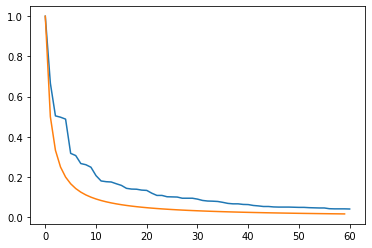

In [13]:
zipf = cvec2_df.sum().sort_values(ascending=False).values
zipf = zipf / zipf[0]
plt.plot(zipf[:61]);
plt.plot([1/x for x in range(1, 61)]);

Words in languages are Zipf-distributed. Roughly speaking, the relative frequency of any word is inversely proportional to its rank. That is to say, the 2nd most common word appears half as often, the 3rd appears about a third as often, etc.

We can look at the tail end of this to see some fun unicode that we didn't successfully clean out!

In [14]:
with pd.option_context("display.max_colwidth", -1, "display.max_rows", None):
    display(cvec2_df.sum().tail(80))

your           51
yours          1 
yourself       3 
youth          3 
youtube        6 
yr             1 
yuck           1 
yukima         1 
yukon          1 
zagorsky       1 
zealand        9 
zebra          1 
zebras         1 
zedd           1 
zemin          1 
zero           3 
zhejiang       1 
zidane         1 
zika           1 
zim            1 
zimbabwe       1 
zimmerman      2 
zinke          1 
zionists       1 
zipper         1 
zodiac         1 
zombie         4 
zombies        2 
zone           3 
zoo            12
zookeeper      1 
zooms          1 
zopittybop     1 
zucchini       1 
zuckerberg     3 
zuma           1 
zuni           1 
çimento        1 
özil           1 
điện           2 
được           1 
đồng           1 
đỡ             1 
бесплатно      1 
временная      1 
для            1 
етериум        1 
краснодаре     1 
майнинги       1 
облачные       1 
регистрация    1 
скачать        1 
элеврус        1 
элефант        1 
اشترك          1 
اكبر      

## Words that are unique to `/r/theonion`

In [15]:
N = 250

In [16]:
theonion_top_words = cvec_df.sum().sort_values(ascending=False).index[:N]

In [17]:
nottheonion_top_words = cvec2_df.sum().sort_values(ascending=False).index[:N]

In [18]:
[(cvec_df[i].sum(),i) for i in theonion_top_words if i not in nottheonion_top_words]

[(96, 'week'),
 (76, 'still'),
 (74, 'nation'),
 (74, 'americans'),
 (67, 'know'),
 (61, 'announces'),
 (58, 'last'),
 (56, 'going'),
 (54, '2018'),
 (53, 'every'),
 (53, 'god'),
 (52, 'way'),
 (52, 'area'),
 (50, 'nations'),
 (46, 'little'),
 (46, 'where'),
 (45, 'campaign'),
 (45, 'things'),
 (43, 'fucking'),
 (42, 'self'),
 (42, 'reveals'),
 (41, 'work'),
 (41, 'hes'),
 (41, 'around'),
 (41, 'or'),
 (40, 'other'),
 (39, 'good'),
 (39, 'trumps'),
 (38, 'american'),
 (38, 'mom'),
 (38, 'cant'),
 (37, 'never'),
 (36, 'entire'),
 (36, 'doesnt'),
 (36, 'plan'),
 (35, 'social'),
 (35, 'right'),
 (35, 'next'),
 (35, 'best'),
 (35, 'any'),
 (34, 'introduces'),
 (34, 'job'),
 (34, 'already'),
 (33, 'scientists'),
 (33, 'ever'),
 (33, 'pictures'),
 (32, 'room'),
 (32, 'few'),
 (32, 'party'),
 (32, 'john'),
 (32, 'friends'),
 (32, 'shit'),
 (32, 'tips'),
 (31, 'again'),
 (31, 'super'),
 (31, 'unveils'),
 (31, 'long'),
 (31, 'some'),
 (30, 'away'),
 (30, 'finally'),
 (30, 'look'),
 (29, 'clinto

## Words that are unique to `/r/nottheonion`

In [19]:
[(cvec2_df[i].sum(),i) for i in nottheonion_top_words if i not in theonion_top_words]

[(216, 'police'),
 (94, 'arrested'),
 (91, 'because'),
 (80, 'sex'),
 (69, 'gets'),
 (63, 'us'),
 (55, 'claims'),
 (55, 'dog'),
 (54, 'men'),
 (51, 'donald'),
 (51, 'florida'),
 (51, 'found'),
 (50, 'gay'),
 (45, 'don'),
 (45, 'wants'),
 (44, 'china'),
 (43, 'fire'),
 (42, 'gun'),
 (42, 'news'),
 (41, 'accidentally'),
 (40, 'texas'),
 (40, 'wife'),
 (40, 'accused'),
 (39, 'teen'),
 (39, 'killed'),
 (37, 'calls'),
 (37, 'city'),
 (35, 'north'),
 (35, 'chinese'),
 (34, 'fight'),
 (34, 'two'),
 (34, 'made'),
 (34, 'mother'),
 (34, 'russian'),
 (33, 'boy'),
 (33, 'sues'),
 (33, 'shot'),
 (33, 'cat'),
 (33, 'son'),
 (32, 'jail'),
 (32, 'water'),
 (32, 'himself'),
 (32, 'kids'),
 (31, 'cops'),
 (31, 'used'),
 (31, 'caught'),
 (31, 'charged'),
 (31, 'girl'),
 (30, 'murder'),
 (30, 'rights'),
 (30, 'chicken'),
 (30, 'students'),
 (29, 'face'),
 (29, 'free'),
 (29, 'use'),
 (29, 'group'),
 (29, 'amp'),
 (28, 'pay'),
 (28, 'tells'),
 (28, 'penis'),
 (27, 'drug'),
 (27, 'husband'),
 (27, 'name'),

## Words that are common to both

In [20]:
[(cvec2_df[i].sum(),i) for i in theonion_top_words if i in nottheonion_top_words]

[(1362, 'to'),
 (687, 'of'),
 (908, 'in'),
 (678, 'for'),
 (665, 'the'),
 (418, 'on'),
 (137, 'new'),
 (356, 'with'),
 (433, 'man'),
 (364, 'after'),
 (227, 'by'),
 (190, 'trump'),
 (246, 'from'),
 (241, 'at'),
 (191, 'he'),
 (73, 'about'),
 (339, 'and'),
 (139, 'that'),
 (148, 'as'),
 (138, 'be'),
 (35, 'just'),
 (148, 'out'),
 (107, 'up'),
 (182, 'it'),
 (43, 'report'),
 (110, 'into'),
 (163, 'who'),
 (34, 'how'),
 (51, 'all'),
 (70, 'you'),
 (101, 'year'),
 (67, 'will'),
 (129, 'not'),
 (109, 'has'),
 (65, 'this'),
 (86, 'have'),
 (64, 'can'),
 (41, 'one'),
 (39, 'time'),
 (33, 'study'),
 (184, 'woman'),
 (32, 'back'),
 (63, 'they'),
 (37, 'day'),
 (53, 'if'),
 (282, 'is'),
 (57, 'off'),
 (123, 'over'),
 (239, 'his'),
 (46, 'life'),
 (43, 'more'),
 (57, 'white'),
 (58, 'him'),
 (51, 'get'),
 (38, 'first'),
 (27, 'finds'),
 (87, 'old'),
 (46, 'house'),
 (33, 'only'),
 (53, 'like'),
 (51, 'your'),
 (29, 'before'),
 (68, 'people'),
 (24, 'what'),
 (26, 'could'),
 (55, 'now'),
 (53, 'no

# Bag of Words + Logistic Regression

## No custom tokenizing, no lemmatizing, no stop words. Let's see what our baseline looks like!

We'll start small by sampling 4000 titles from both subreddits

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_sample["title"], X_sample["is_onion"])
pipe = Pipeline([
    ("cvec", CountVectorizer()),
    ("logreg", LogisticRegressionCV(Cs=np.logspace(-2,2,100), max_iter=1000))])
     
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

0.9828333333333333

In [22]:
pipe.score(X_test, y_test)

0.81

In [23]:
# pipe[1].scores_[1]

In [24]:
pipe[1].C_

array([0.7924829])

Now we'll score our model on the holdout data we didn't end up sampling:

In [25]:
pipe.score(theonion_holdout["title"], theonion_holdout["is_onion"])

0.796207497820401

In [26]:
pipe.score(nottheonion_holdout["title"], nottheonion_holdout["is_onion"])

0.8076487702430613

In [71]:
X_theonion[X_theonion["title"].str.contains("nations")]

,title,score,created_utc,len,word_len,is_onion
id,,,,,,
2s1e6p,CBS To Feature In-Studio Fan To Provide Partia...,5,1420956055,84,13,1
59k1j4,Wealthy Father Nervously Waits For Response Af...,2,1477515503,97,14,1
7sgjpm,Are Our Nominations Diverse Enough For You Whi...,10,1516732568,117,16,1
8ye5g8,"Thing Distracting You From Healthy, Self-Actua...",8,1531432712,90,11,1
9hkcfv,Jimmy Butler Gives Wolves List Of 29 Preferred...,14,1537488003,65,10,1
a66n9f,Red Cross Issues Reminder They Cant Accept Don...,1,1544807053,97,16,1
aj2k4f,Bryan Singer Celebrates Bohemian Rhapsody Osca...,1,1548267016,102,14,1
aj4jzz,"The Favourite, Roma Top Oscars Nominations Wit...",1,1548277836,55,9,1
apw1qw,Vaccinations Soar By 500% In Measles Outbreak ...,1,1549993878,52,8,1


In [72]:
X_nottheonion[X_nottheonion["title"].str.contains("nations")]

,title,score,created_utc,len,word_len,is_onion
81,Bloomberg Bans Food Donations To The Homeless ...,35,1332221866,113,18,-1
889,"Julian Assange, While Hiding At The Ecuadorian...",12,1341058872,207,33,-1
893,John Roberts’ Medication Made Him Stupid And O...,1,1341080800,99,14,-1
3486,Obama Accepts 'Osama Bin Laden' Donations,0,1351558162,41,6,-1
3780,New York Mayor Banned Food Donations To Homele...,16,1352424497,117,19,-1
...,...,...,...,...,...,...
417154,Only A Tenth Of Vatican Donations Directed To ...,1,1576183459,53,9,-1
417370,Federal Authorities Arrest Doctors Campaigning...,1,1576336523,85,11,-1
418720,New Jersey Vote On Forced Vaccinations Shut Do...,1,1577261623,63,10,-1
419690,Morrison Touts For Lib Party Donations On Govt...,1,1578293596,69,11,-1


In [68]:
pd.DataFrame(np.exp(pipe[1].coef_[0]), index=pipe[0].get_feature_names(), columns=["odds multiplier"]).sort_values("odds multiplier").head(50)

,odds multiplier
don,0.116656
police,0.167605
arrested,0.177086
accused,0.198700
re,0.223864
jail,0.237137
china,0.237268
texas,0.255145
stolen,0.264024
sues,0.267916


In [69]:
pd.DataFrame(np.exp(pipe[1].coef_[0]), index=pipe[0].get_feature_names(), columns=["odds multiplier"]).sort_values("odds multiplier").tail(50)

,odds multiplier
michael,2.789368
today,2.792008
never,2.821114
releases,2.840062
last,2.880426
bond,2.910017
social,2.935832
reviews,2.941157
apparently,2.946882
biden,2.966097


## Hyperparameter searching ft. ngrams, finite features, stop words

Can we improve this with a hyperparameter search? We will consider using stop words, ngrams, a finite number of features, and a few other hyperparameters.

In [27]:
pipe = Pipeline([
    ("cvec", CountVectorizer(strip_accents="unicode")),
#     ("norm", Normalizer()),
    ("logreg", LogisticRegression(max_iter=1000))
])

rand_search = RandomizedSearchCV(pipe,
                                 n_jobs=-2,
                                 n_iter=50,
                                 param_distributions={
    "logreg__C": np.logspace(-1,1,100),
    "cvec__max_df": [.99, 1],
    "cvec__min_df": [0, 0.01],
    "cvec__stop_words": [None, [i for i in theonion_top_words if i in nottheonion_top_words]],
    "cvec__ngram_range": [(1,1), (1,2)],
    "cvec__max_features": [None, 10, 50, 100, 250, 500, 1000, 2000, 5000, 10000, 20000, 50000]
})
rand_search.fit(X_train, y_train);

In [28]:
rand_search.best_estimator_

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.99,
                                 max_features=10000, min_df=0,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents='unicode',
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('logreg',
                 LogisticRegression(C=0.6734150657750824, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=1000, multi_class='auto',
             

In [29]:
rand_search.score(X_train, y_train)

0.9685

In [30]:
rand_search.score(X_test, y_test)

0.8005

In [31]:
rand_search.score(theonion_holdout["title"], theonion_holdout["is_onion"])

0.7931560592850916

In [32]:
rand_search.score(nottheonion_holdout["title"], nottheonion_holdout["is_onion"])

0.8050572730513194

This is a marginal improvement over our naive model, but it's worth noting that we finish training this model in half the time.

# CountVectorizer + Naive Bayes

In the following section, we apply a variety of Naive Bayes models to our CountVectorized titles.

## CVec + MultinomialNB
### Naive

In [33]:
pipe = Pipeline([
    ("cvec", CountVectorizer()),
    ("mnb", MultinomialNB())
])
     
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('mnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [34]:
display(pipe.score(X_train, y_train))
display(pipe.score(X_test, y_test))
display(pipe.score(theonion_holdout["title"], theonion_holdout["is_onion"]))
display(pipe.score(nottheonion_holdout["title"], nottheonion_holdout["is_onion"]))

0.9541666666666667

0.8115

0.8110287707061901

0.8055365555245132

### RandomizedSearchCV'd

In [35]:
pipe = Pipeline([
    ("cvec", CountVectorizer(strip_accents="unicode")),
    ("mnb", MultinomialNB())
])

rand_search = RandomizedSearchCV(pipe,
                                 n_jobs=-2,
                                 n_iter=50,
                                 param_distributions={
    "mnb__alpha": np.linspace(0,1,11),
    "cvec__max_df": [.99, 1],
    "cvec__min_df": [0, 0.01],
    "cvec__stop_words": [None, [i for i in theonion_top_words if i in nottheonion_top_words]],
    "cvec__ngram_range": [(1,1), (1,2)],
    "cvec__max_features": [None, 10, 50, 100, 250, 500, 1000, 2000, 5000, 10000, 20000, 50000]
})
rand_search.fit(X_train, y_train);

In [36]:
rand_search.best_estimator_

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.99,
                                 max_features=10000, min_df=0,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents='unicode',
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('mnb',
                 MultinomialNB(alpha=0.9, class_prior=None, fit_prior=True))],
         verbose=False)

In [37]:
display(rand_search.score(X_train, y_train))
display(rand_search.score(X_test, y_test))
display(rand_search.score(theonion_holdout["title"], theonion_holdout["is_onion"]))
display(rand_search.score(nottheonion_holdout["title"], nottheonion_holdout["is_onion"]))

0.9443333333333334

0.812

0.8053618134263295

0.8031425516131829

## CVec + ComplementNB

In [38]:
pipe = Pipeline([
    ("cvec", CountVectorizer()),
    ("cnb", ComplementNB())
])
     
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('cnb',
                 ComplementNB(alpha=1.0, class_prior=None, fit_prior=True,
                              norm=False))],
         verbose=False)

In [39]:
display(pipe.score(X_train, y_train))
display(pipe.score(X_test, y_test))
display(pipe.score(theonion_holdout["title"], theonion_holdout["is_onion"]))
display(pipe.score(nottheonion_holdout["title"], nottheonion_holdout["is_onion"]))

0.9543333333333334

0.8115

0.8103748910200523

0.8072561921368773

In [40]:
pipe = Pipeline([
    ("cvec", CountVectorizer(strip_accents="unicode")),
    ("cnb", ComplementNB())
])

rand_search = RandomizedSearchCV(pipe,
                                 n_jobs=-2,
                                 n_iter=50,
                                 param_distributions={
    "cnb__alpha": np.linspace(0,1,11),
    "cvec__max_df": [.99, 1],
    "cvec__min_df": [0, 0.01],
    "cvec__stop_words": [None, [i for i in theonion_top_words if i in nottheonion_top_words]],
    "cvec__ngram_range": [(1,1), (1,2)],
    "cvec__max_features": [None, 10, 50, 100, 250, 500, 1000, 2000, 5000, 10000, 20000, 50000]
})
rand_search.fit(X_train, y_train);

In [41]:
display(rand_search.score(X_train, y_train))
display(rand_search.score(X_test, y_test))
display(rand_search.score(theonion_holdout["title"], theonion_holdout["is_onion"]))
display(rand_search.score(nottheonion_holdout["title"], nottheonion_holdout["is_onion"]))

0.9551666666666667

0.812

0.8003487358326068

0.7988651361740253

## CVec + BernoulliNB

In [42]:
pipe = Pipeline([
    ("cvec", CountVectorizer()),
    ("bnb", BernoulliNB())
])
     
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('bnb',
                 BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                             fit_prior=True))],
         verbose=False)

In [43]:
display(pipe.score(X_train, y_train))
display(pipe.score(X_test, y_test))
display(pipe.score(theonion_holdout["title"], theonion_holdout["is_onion"]))
display(pipe.score(nottheonion_holdout["title"], nottheonion_holdout["is_onion"]))

0.9545

0.8125

0.8007846556233653

0.8159531218389033

In [44]:
pipe = Pipeline([
    ("cvec", CountVectorizer(strip_accents="unicode")),
    ("bnb", BernoulliNB())
])

rand_search = RandomizedSearchCV(pipe,
                                 n_jobs=-2,
                                 n_iter=50,
                                 param_distributions={
    "bnb__alpha": np.linspace(0,1,11),
    "cvec__max_df": [.99, 1],
    "cvec__min_df": [0, 0.01],
    "cvec__stop_words": [None, [i for i in theonion_top_words if i in nottheonion_top_words]],
    "cvec__ngram_range": [(1,1), (1,2)],
    "cvec__max_features": [None, 10, 50, 100, 250, 500, 1000, 2000, 5000, 10000, 20000, 50000]
})
rand_search.fit(X_train, y_train);

In [45]:
display(rand_search.score(X_train, y_train))
display(rand_search.score(X_test, y_test))
display(rand_search.score(theonion_holdout["title"], theonion_holdout["is_onion"]))
display(rand_search.score(nottheonion_holdout["title"], nottheonion_holdout["is_onion"]))

0.9618333333333333

0.81

0.7948997384481256

0.8105630003564512

# Conclusions

There's nothing like fitting 8 (technically a LOT more than 8) very similar models and seeing them perform virtually identically...

In all seriousness, our first model, with naive CountVectorization + a basic Logistic Regression was very performant, and in fact none of our additional models appeared to make significant differences. BernoulliNB ended up being the best, but we haven't sampled these results enough for them to be numerically stable, so it's hard to say anything. In a world where I have infinite time and computation budget, I could resample these test scores with different samples until I had confidence intervals, and then could do a hypothesis test. We'll leave this as an exercise to a hypothetical reader.

In our next notebook, we'll explore using TF-IDF instead of CountVectorizer and seeing how much our results. In the notebook after that, we'll explore using lemmatization and word embeddings with spaCy.